# Chapter 4 - Identifying Words
품사태깅 - 단어식별

<br></br>
## 1 품사태깅
POS : Parts of Speech

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html : Tag list

### 01 nltk.pos_tag()
sentence 의 tag 붙이기

In [6]:
# token 으로 나눈다
import nltk
text = nltk.word_tokenize("It is a pleasant day today"); text

['It', 'is', 'a', 'pleasant', 'day', 'today']

In [7]:
# nltk.pos_tag() : word token list 를 삽입하면 된다
nltk.pos_tag(['It', 'is', 'a', 'pleasant', 'day', 'today'])

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('pleasant', 'JJ'),
 ('day', 'NN'),
 ('today', 'NN')]

In [9]:
# 해당 tag의 내용 확인하기
import nltk
nltk.help.upenn_tagset('NNS') # 복수주어

NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...
None


In [10]:
# 정규표현식으로 tag 내용 확인하기
# 동사관련 내용들 확인
import nltk
nltk.help.upenn_tagset('VB.*')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
VBD: verb, past tense
    dipped pleaded swiped regummed soaked tidied convened halted registered
    cushioned exacted snubbed strode aimed adopted belied figgered
    speculated wore appreciated contemplated ...
VBG: verb, present participle or gerund
    telegraphing stirring focusing angering judging stalling lactating
    hankerin' alleging veering capping approaching traveling besieging
    encrypting interrupting erasing wincing ...
VBN: verb, past participle
    multihulled dilapidated aerosolized chaired languished panelized used
    experimented flourished imitated reunifed factored condensed sheared
    unsettled primed dubbed desired ...
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
 

In [15]:
import nltk
text=nltk.word_tokenize("I cannot bear the pain of bear")
nltk.pos_tag(text)

[('I', 'PRP'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('bear', 'VB'),
 ('the', 'DT'),
 ('pain', 'NN'),
 ('of', 'IN'),
 ('bear', 'NN')]

### 02 nltk.tag.str2tuple()
sacred/VBN Ganga/NNP : text와 tag 같이붙은 단어를 나눈다 (regex)

In [16]:
import nltk
taggedword = nltk.tag.str2tuple('bear/MD'); taggedword

('bear', 'MD')

In [69]:
import nltk
sentence = '''The/DT sacred/VBN Ganga/NNP flows/VBZ in/IN this/DT region/NN 
              ./. This/DT is/VBZ a/DT pilgrimage/NN ./. People/NNP from/IN all/DT 
              over/IN the/DT country/NN visit/NN this/DT place/NN ./. '''
[nltk.tag.str2tuple(t) for t in sentence.split()]

[('The', 'DT'),
 ('sacred', 'VBN'),
 ('Ganga', 'NNP'),
 ('flows', 'VBZ'),
 ('in', 'IN'),
 ('this', 'DT'),
 ('region', 'NN'),
 ('.', '.'),
 ('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('pilgrimage', 'NN'),
 ('.', '.'),
 ('People', 'NNP'),
 ('from', 'IN'),
 ('all', 'DT'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('country', 'NN'),
 ('visit', 'NN'),
 ('this', 'DT'),
 ('place', 'NN'),
 ('.', '.')]

In [18]:
# tuple2str() : tag tuple
import nltk
taggedtok = ('bear', 'NN')
from nltk.tag.util import tuple2str
tuple2str(taggedtok)

'bear/NN'

In [23]:
# treebank 말뭉치를 기준으로 연산
import nltk
from nltk.corpus import treebank
treebank_tagged = treebank.tagged_words(tagset='universal')
print('treebank_tagged :', len(treebank_tagged))

tag = nltk.FreqDist(tag    for (word, tag) in treebank_tagged)
tag.most_common(5) # count 결과를 출력

treebank_tagged : 100676


[('NOUN', 28867), ('VERB', 13564), ('.', 11715), ('ADP', 9857), ('DET', 8725)]

In [21]:
# 명사 태그전에 발생한 tag의 수를 계산
tagpairs = nltk.bigrams(treebank_tagged)
preceders_noun = [x[1] for (x, y) in tagpairs if y[1] == 'NOUN']
freqdist = nltk.FreqDist(preceders_noun)
[tag for (tag, _) in freqdist.most_common()]

['NOUN', 'DET', 'ADJ', 'ADP', '.', 'VERB', 'NUM', 'PRT', 'CONJ', 'PRON', 'X', 'ADV']


In [26]:
# 기본적인 tuple 생성
tag={}
tag['beautiful']='ADJ'
tag['boy']='N'
tag['read']='V'
tag['generously']='ADV'
tag

{'beautiful': 'ADJ', 'boy': 'N', 'generously': 'ADV', 'read': 'V'}

### 03 기본태깅
DefaultTagger

In [27]:
# 사용자가 특정한 tag를 첨부
from nltk.tag import DefaultTagger
tag = DefaultTagger('NN')
tag.tag(['Beautiful', 'morning'])

[('Beautiful', 'NN'), ('morning', 'NN')]

In [28]:
# tag 포함된 tuple의 tag를 삭제하
from nltk.tag import untag
untag([('beautiful', 'NN'), ('morning', 'NN')])

['beautiful', 'morning']

<br></br>
## 2 POS-tagged corpors 생성하기
corpora : 말뭉치의 집합

In [31]:
# ~/nltkdoc 폴더를 생성
import nltk, os,os.path
create = os.path.expanduser('~/nltkdoc')
# 폴더 존재 확인
if not os.path.exists(create):
    os.mkdir(create)
print(os.path.exists(create))
# 
import nltk.data
print(create in nltk.data.path)

True
False


In [36]:
# text 파일 불러오기
import nltk.data
nltk.data.load('./data/adam_smith.txt',format='raw')[:300]

b'\xef\xbb\xbfThe Project Gutenberg EBook of An Inquiry into the Nature and Causes of\r\nthe Wealth of Nations, by Adam Smith\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenbe'

In [56]:
# names 말뭉치 활용
from nltk.corpus import names
print(names.fileids())  # 여성이름/ 남성이름 샘플을 불러온다
print('male.txt   len({}) : {}'.format(len(names.words('male.txt')), names.words('male.txt')[:10]))
print('female.txt len({}) : {}'.format(len(names.words('female.txt')), names.words('female.txt')[:10]))

['female.txt', 'male.txt']
male.txt   len(2943) : ['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim']
female.txt len(5001) : ['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


In [58]:
# words 말뭉치 활용
from nltk.corpus import words
print(words.fileids())
print('en      :', len(words.words('en')))
print('en-basic:',len(words.words('en-basic')))

['en', 'en-basic']
en      : 235886
en-basic: 850


<br></br>
## 3 기계학습 알고리즘
rule-based, probabilistic (태깅규칙, 확률) 규칙기반 알고리즘

In [ ]:
# nltk.tag 관련 모듈들이 현재는 비존재...

In [62]:
# FastBrillTaggerTrainer, SymmetricProximateTokensTemplate 가 없음

from nltk.tag import UnigramTagger
#from nltk.tag import FastBrillTaggerTrainer
#from nltk.tag.brill import SymmetricProximateTokensTemplate

In [72]:
#from nltk.tag.brill import ProximateTokensTemplate
#from nltk.tag.brill import ProximateTagsRule
#from nltk.tag.brill import ProximateWordsRule
# ctx = [ # Context = surrounding words and tags.
#     SymmetricProximateTokensTemplate(ProximateTagsRule, (1, 1)),
#     SymmetricProximateTokensTemplate(ProximateTagsRule, (1, 2)),
#     SymmetricProximateTokensTemplate(ProximateTagsRule, (1, 3)),
#     SymmetricProximateTokensTemplate(ProximateTagsRule, (2, 2)),
#     SymmetricProximateTokensTemplate(ProximateWordsRule, (0, 0)),
#     SymmetricProximateTokensTemplate(ProximateWordsRule, (1, 1)),
#     SymmetricProximateTokensTemplate(ProximateWordsRule, (1, 2)),
#     ProximateTokensTemplate(ProximateTagsRule, (-1, -1), (1, 1)),]
#tagger = UnigramTagger(sentence)
#tagger = FastBrillTaggerTrainer(tagger, ctx, trace=0)
#tagger = tagger.train(sentences, max_rules=100)

<br></br>
## 4 n-gram 접근법과 관련된 통계 모델링
UnigramTagger

### 01 UnigramTagger 의 훈련 및 검증
UnigramTagger

In [76]:
# TreeBank 말뭉치의 7,000개 문장을 훈련
import nltk
from nltk.tag import UnigramTagger
from nltk.corpus import treebank
training = treebank.tagged_sents()[:7000]
training

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], ...]

In [80]:
unitagger = UnigramTagger(training)
# treebank.sents()[0]              # tag제거한 word만 출력
unitagger.tag(treebank.sents()[0]) # tag를 붙여서 출력

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [82]:
training = treebank.tagged_sents()[:7000]
testing = treebank.tagged_sents()[2000:]

unitagger = UnigramTagger(training) # train 훈련 시행
unitagger.evaluate(testing)         # test를 활용평가 (정확도 측정)

0.9619024159944167

In [83]:
unitag = UnigramTagger(model={'Vinken': 'NN'})
unitag.tag(treebank.sents()[0])

[('Pierre', None),
 ('Vinken', 'NN'),
 (',', None),
 ('61', None),
 ('years', None),
 ('old', None),
 (',', None),
 ('will', None),
 ('join', None),
 ('the', None),
 ('board', None),
 ('as', None),
 ('a', None),
 ('nonexecutive', None),
 ('director', None),
 ('Nov.', None),
 ('29', None),
 ('.', None)]

In [84]:
# 최소 임계빈도를 측정하기 위한 특정값을 cut-off값에 전달
unitagger = UnigramTagger(training, cutoff=5)
unitagger.evaluate(testing)

0.7972986842375351

In [85]:
# back-off tagging을 테스트
# 다른 프로세서와의 통신시 정상적인 흐름이 되지 않을 때 일정 시간동안 특정 간격으로 같은 데이터를 재 요청
from nltk.tag import UnigramTagger, DefaultTagger
from nltk.corpus import treebank

testing  = treebank.tagged_sents()[2000:]
training = treebank.tagged_sents()[:7000]
tag1 = DefaultTagger('NN')
tag2 = UnigramTagger(training, backoff = tag1)
tag2.evaluate(testing)

0.9619024159944167

### 02 BigramTagger 의 훈련 및 검증
BigramTagger

In [86]:
from nltk.tag import BigramTagger
from nltk.corpus import treebank

training_1 = treebank.tagged_sents()[:7000]
# BigramTagger 훈련
bigramtagger = BigramTagger(training_1)
treebank.sents()[0]

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [87]:
bigramtagger.tag(treebank.sents()[0])

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [88]:
# BigramTagger 검증
testing_1 = treebank.tagged_sents()[2000:]
bigramtagger.evaluate(testing_1)

0.9171131227292321

### 03 BigramTagger , TrigramTagger.. etc 를 활용한 학습
BigramTagger, TrigramTagger

In [89]:
# BigramTagger, TrigramTagger 를 훈련 및 검증비교
from nltk.tag import BigramTagger, TrigramTagger
from nltk.corpus import treebank
training  = treebank.tagged_sents()[:7000]
testing   = treebank.tagged_sents()[2000:]

bigramtag = BigramTagger(training)
trigramtag = TrigramTagger(training)
print('bigramtag :',bigramtag.evaluate(testing))
print('trigramtag:',trigramtag.evaluate(testing))

bigramtag : 0.9171131227292321
trigramtag: 0.9022107272615308


In [90]:
# quadgramtag 를 훈련 및 검증
from nltk.corpus import treebank
from nltk import NgramTagger

testing = treebank.tagged_sents()[2000:]
training= treebank.tagged_sents()[:7000]
quadgramtag = NgramTagger(4, training)
quadgramtag.evaluate(testing)

0.9304554878173943

### 04 affixtag로 학습 및 검증
affixtag

In [91]:
# affixtag : 접두사, 점미사를 활용한 학습 및 검증
from nltk.tag import AffixTagger
from nltk.corpus import treebank

testing = treebank.tagged_sents()[2000:]
training= treebank.tagged_sents()[:7000]
affixtag = AffixTagger(training)
affixtag.evaluate(testing)

0.2902682841718497

In [92]:
# affixtag : (+4) 4개의 접두사 묶어서 학습 및 검증
from nltk.tag import AffixTagger
from nltk.corpus import treebank

testing = treebank.tagged_sents()[2000:]
training= treebank.tagged_sents()[:7000]
prefixtag = AffixTagger(training, affix_length = 4)
prefixtag.evaluate(testing)

0.2094751318841472

In [93]:
# affixtag : (-3) 3개의 접미사 묶어서 학습 및 검증
prefixtag = AffixTagger(training, affix_length = 3)
prefixtag.evaluate(testing)

0.25699447831352507

In [95]:
# affitag 를 back-off chain 로 학습 및 검증
testing = treebank.tagged_sents()[2000:]
training= treebank.tagged_sents()[:7000]

prefixtagger = AffixTagger(training, affix_length = 4)
prefixtagger3 = AffixTagger(training,affix_length = 3, backoff = prefixtagger)
prefixtagger3.evaluate(testing)

0.25841082168442225

In [96]:
suffixtagger3 = AffixTagger(training, affix_length = -3, backoff = prefixtagger3)
suffixtagger3.evaluate(testing)

0.2940451998275756

In [97]:
suffixtagger4 = AffixTagger(training, affix_length = -4, backoff = suffixtagger3)
suffixtagger4.evaluate(testing)

0.33072644046226163

### 05 Trigram n Tags - 2차 마르코프모델을 기반한 학습
Trigram n Tags 

In [98]:
from nltk.tag import tnt
from nltk.corpus import treebank

testing = treebank.tagged_sents()[2000:]
training= treebank.tagged_sents()[:7000]
tnt_tagger=tnt.TnT()
tnt_tagger.train(training)
tnt_tagger.evaluate(testing)

0.9882176652913768

## 5 pos-tagged data를 사용한 chunker 개발
chunker를 설계 및 수행

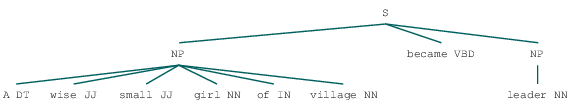

In [101]:
import nltk
sent = [("A","DT"),("wise", "JJ"), ("small", "JJ"),("girl", "NN"), 
        ("of", "IN"), ("village", "N"),  ("became", "VBD"), ("leader", "NN")]
sent = [("A","DT"),("wise", "JJ"), ("small", "JJ"),("girl", "NN"), 
        ("of", "IN"), ("village", "NN"),  ("became", "VBD"), ("leader", "NN")]
grammar = "NP: {<DT>?<JJ>*<NN><IN>?<NN>*}"
find = nltk.RegexpParser(grammar)
res = find.parse(sent)
res

In [103]:
#res.draw()

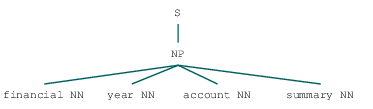

In [104]:
import nltk
noun1 = [("financial","NN"),("year","NN"),("account","NN"),("summary","NN")]
gram = "NP:{<NN>+}"
find = nltk.RegexpParser(gram)
find.parse(noun1)

In [105]:
# x = find.parse(noun1)
# x.draw()